In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


# Lab - Segmentação de Consumidores Para Campanhas Customizadas de Marketing

# Objetivo: Encontrar segmentos de consumidores para campanhas personalizadas de Marketing.

In [ ]:
Clustering com K-Means
https://cran.r-project.org/web/views/Cluster.html

Obs: Caso tenha problemas com a acentuação, consulte este link:
 https://support.rstudio.com/hc/en-us/articles/200532197-Character-Encoding

In [ ]:
%%R
# Pacotes
install.packages("factoextra")
install.packages("cluster")
install.packages("fpc")
install.packages("NbClust")
install.packages("clValid")
install.packages("clustertend")
library(factoextra)
library(cluster)
library(fpc)
library(NbClust)
library(clValid)
library(magrittr)
library(clustertend)

##Carregando os dados

In [6]:
%%R
dados_clientes_v1 <- read.csv("dados_clientes.csv")

In [7]:
%%R
str(dados_clientes_v1)

'data.frame':	200 obs. of  5 variables:
 $ IDCliente            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Sexo                 : Factor w/ 2 levels "Feminino","Masculino": 2 2 1 1 1 1 1 1 2 1 ...
 $ Idade                : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Salario_Mensal_Milhar: int  15 15 16 16 17 17 18 18 19 19 ...
 $ Pontuacao_Gasto      : int  39 81 6 77 40 76 6 94 3 72 ...


In [12]:
%%R
names(dados_clientes_v1)

[1] "IDCliente"             "Sexo"                  "Idade"                
[4] "Salario_Mensal_Milhar" "Pontuacao_Gasto"      


In [ ]:
%%R
#View(dados_clientes_v1)

##Análise Exploratória

In [10]:
%%R
# Tabela de proporção do sexo dos clientes
tabela_sexos = table(dados_clientes_v1$Sexo)
tabela_sexos


 Feminino Masculino 
      112        88 


Checar valores missing através da tabela

In [14]:
%%R
table(dados_clientes_v1$Sexo, useNA = "ifany")


 Feminino Masculino 
      112        88 


Buscando valores missing para variáveis relacionadas à **idade** - Função summary() é capaz de retornar **isna**

In [15]:
%%R
summary(dados_clientes_v1$Idade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 


Buscando a média de idade

In [17]:
%%R
mean(dados_clientes_v1$Idade)

[1] 38.85


---
Barplot de proporção do sexo dos clientes

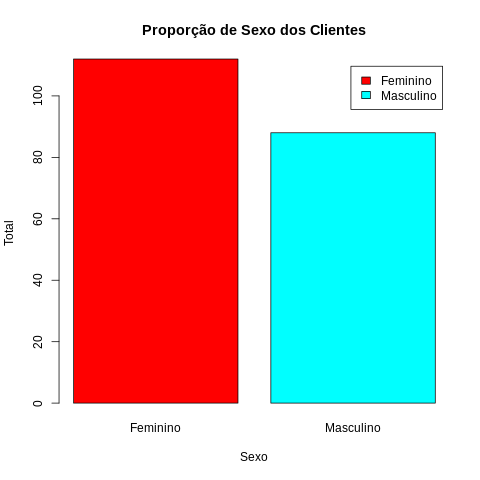

In [18]:
%%R
barplot(tabela_sexos,
        main = "Proporção de Sexo dos Clientes",
        ylab = "Total",
        xlab = "Sexo",
        col = rainbow(2),
        legend = rownames(tabela_sexos))

---
Histograma com a distribuição de frequência das idades dos clientes


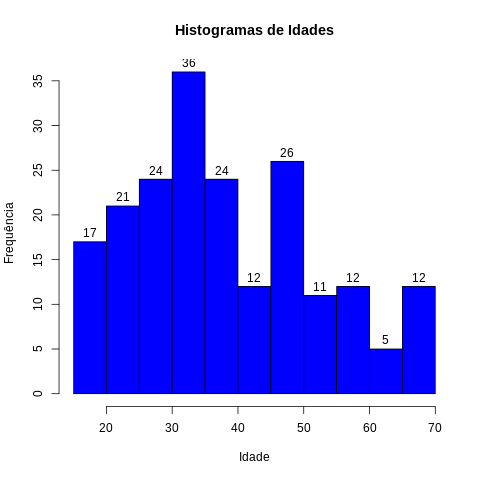

In [19]:
%%R
hist(dados_clientes_v1$Idade,
     col = "blue",
     main = "Histogramas de Idades",
     xlab = "Idade",
     ylab = "Frequência",
     labels = TRUE)

---
Boxplot para análise descritiva da idade

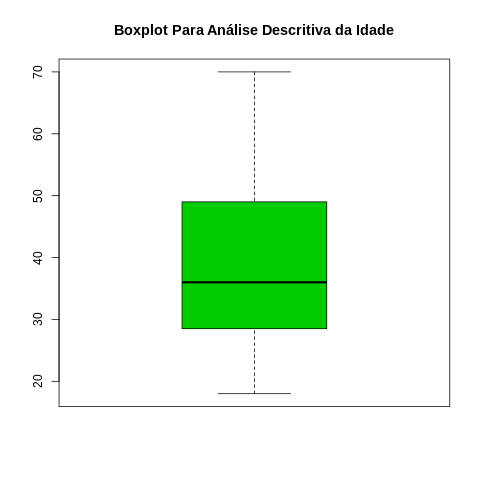

In [20]:
%%R
boxplot(dados_clientes_v1$Idade, 
        col = 3, 
        main = "Boxplot Para Análise Descritiva da Idade")

---
Histograma com a distribuição de frequência do salário mensal


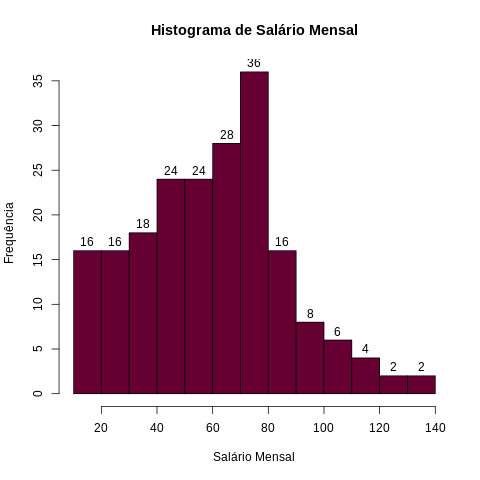

In [24]:
%%R
names(dados_clientes_v1)
summary(dados_clientes_v1$Salario_Mensal_Milhar)
hist(dados_clientes_v1$Salario_Mensal_Milhar,
     col = "#660033",
     main = "Histograma de Salário Mensal",
     xlab = "Salário Mensal",
     ylab = "Frequência",
     labels = TRUE)


---
##Análise da Pontuação dos Clientes

In [21]:
%%R
summary(dados_clientes_v1$Pontuacao_Gasto)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 


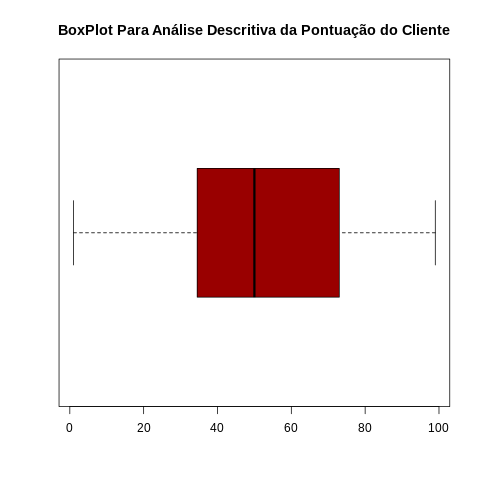

In [25]:
%%R
boxplot(dados_clientes_v1$Pontuacao_Gasto,
        horizontal = TRUE,
        col = "#990000",
        main = "BoxPlot Para Análise Descritiva da Pontuação do Cliente")

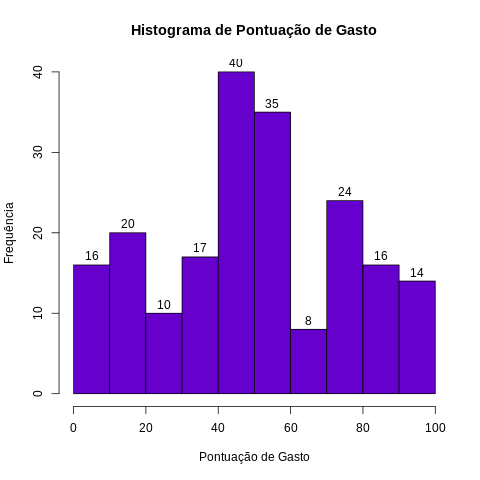

In [23]:
%%R
hist(dados_clientes_v1$Pontuacao_Gasto,
     main = "Histograma de Pontuação de Gasto",
     xlab = "Pontuação de Gasto",
     ylab = "Frequência",
     col = "#6600cc",
     labels = TRUE)

---
##Pré-Processamento dos Dados - Versão_2

Pré-processando e analisando os dados independente do sexo


In [27]:
%%R
dados_clientes_v2 <- dados_clientes_v1[,-c(1,2)]
head(dados_clientes_v2)

  Idade Salario_Mensal_Milhar Pontuacao_Gasto
1    19                    15              39
2    21                    15              81
3    20                    16               6
4    23                    16              77
5    31                    17              40
6    22                    17              76


---
Padronizando as variáveis - K-Means requer dados normalizados numa **distribuição normal**, média igual a 0 e desvio padrão igual a 1

In [29]:
%%R
# Estestes dados representam os mesmos dados do head() acima
dados_clientes_v2_scaled = scale(dados_clientes_v2)
head(dados_clientes_v2_scaled)

          Idade Salario_Mensal_Milhar Pontuacao_Gasto
[1,] -1.4210029             -1.734646      -0.4337131
[2,] -1.2778288             -1.734646       1.1927111
[3,] -1.3494159             -1.696572      -1.7116178
[4,] -1.1346547             -1.696572       1.0378135
[5,] -0.5619583             -1.658498      -0.3949887
[6,] -1.2062418             -1.658498       0.9990891


---
## Avaliando a Tendência de Cluster - **Número ideal de Clusters**
Estatística Hopkins para o conjunto de dados, métrica que verifica se o conjunto é **"clusterizável**"
- Valores > .5 significam que o dataset não é "clusterizável"
- Valores < .5 significam que o dataset é "clusterizável"

<font color = 'red'>Quanto mais próximo de zero, melhor. 

In [ ]:
%%R
set.seed(123)
?hopkins
hopkins(dados_clientes_v2_scaled, n = nrow(dados_clientes_v2_scaled)-1)

Valor = 0.3137406 indica que o dataset é "clusterizável".

---

## K-means - Determinando o Número Ideal de Clusters - NbClust()

Pacote NbClust: 30 índices para determinar o número de clusters em um conjunto de dados.
-  Se index = 'all' - Executa 30 índices para determinar o número ideal de clusters.
-  Se index = "silhouette" - Usa uma medida para estimar a diferença entre clusters.

Um valor de silhueta mais alto é preferido para determinar o número ideal de clusters


#**Opção 1**

In [31]:
%%R
# Opção 1:
?NbClust
num_clusters_opt1 <- NbClust(dados_clientes_v2_scaled,  
                             distance = "euclidean",
                             min.nc = 2, # testar de 2
                             max.nc = 15, # a 15 clusters
                             method = "kmeans",
                             index = "silhouette")

Best.nc - Melhor número de clusters

In [32]:
%%R
num_clusters_opt1$Best.nc

Number_clusters     Value_Index 
         6.0000          0.4274 


In [33]:
%%R
num_clusters_opt1$All.index

     2      3      4      5      6      7      8      9     10     11     12 
0.3355 0.3578 0.3498 0.4166 0.4274 0.3870 0.4121 0.4153 0.4261 0.4187 0.4046 
    13     14     15 
0.3750 0.3651 0.3550 


---
##**Opção 2**

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 4 proposed 6 as the best number 

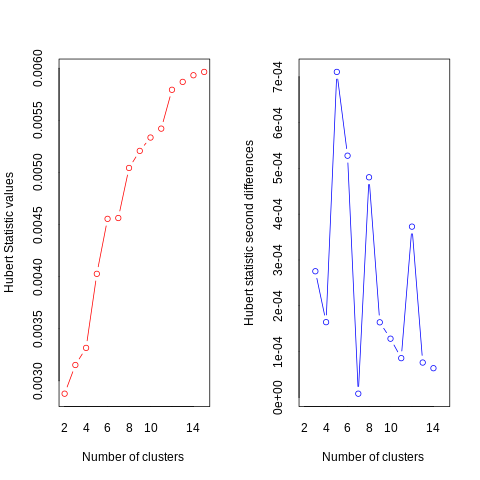

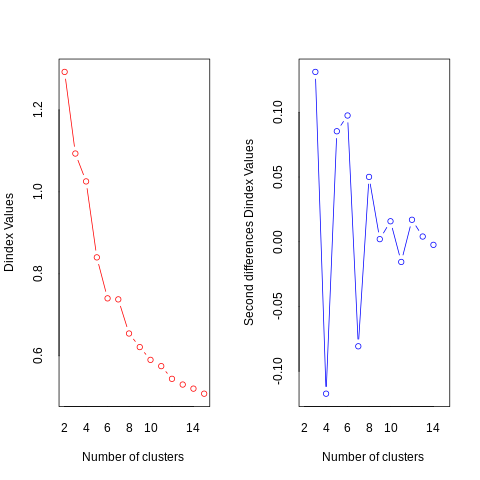

In [34]:
%%R
# Opção 2:
num_clusters_opt2 <- NbClust(dados_clientes_v2_scaled,  
                             distance = "euclidean", 
                             min.nc = 2, 
                             max.nc = 15, 
                             method = "kmeans",
                             index = "all")

Um método recomenda 6 clusters e o outro recomenda 2. Usaremos 4 clusters.


---
##Criação do Modelo K-Means e Análise de Cluster

In [35]:
%%R
?kmeans
modelo <- kmeans(dados_clientes_v2_scaled, 4)
print(modelo)

K-means clustering with 4 clusters of sizes 38, 40, 65, 57

Cluster means:
        Idade Salario_Mensal_Milhar Pontuacao_Gasto
1  0.03711223             0.9876366      -1.1857814
2 -0.42773261             0.9724070       1.2130414
3  1.08344244            -0.4893373      -0.3961802
4 -0.96008279            -0.7827991       0.3910484

Clustering vector:
  [1] 4 4 4 4 4 4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 [38] 4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 4 4 3 3 3 3
 [75] 3 4 3 3 4 3 3 4 3 3 4 3 3 4 4 3 3 4 3 3 4 4 3 4 3 4 4 3 3 4 3 4 3 3 3 3 3
[112] 4 1 4 4 4 3 3 3 3 4 1 2 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
[149] 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
[186] 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2

Within cluster sum of squares by cluster:
[1] 44.01863 23.91544 74.83280 61.43215
 (between_SS / total_SS =  65.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "to

---
Verificando o tamanho dos clusters


In [36]:
%%R
modelo$size

[1] 38 40 65 57


---
Verificando o centro|centroides dos clusters

In [37]:
%%R
# Verificando o centro dos clusters
modelo$centers

        Idade Salario_Mensal_Milhar Pontuacao_Gasto
1  0.03711223             0.9876366      -1.1857814
2 -0.42773261             0.9724070       1.2130414
3  1.08344244            -0.4893373      -0.3961802
4 -0.96008279            -0.7827991       0.3910484


---
Aplicando o ID dos clusters ao DataFrame original

In [38]:
%%R
# Aplicando o ID dos clusters ao dataframe original
modelo$cluster

  [1] 4 4 4 4 4 4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 [38] 4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 4 4 3 3 3 3
 [75] 3 4 3 3 4 3 3 4 3 3 4 3 3 4 4 3 3 4 3 3 4 4 3 4 3 4 4 3 3 4 3 4 3 3 3 3 3
[112] 4 1 4 4 4 3 3 3 3 4 1 2 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
[149] 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
[186] 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2


In [39]:
%%R
dados_clientes_v1$Cluster <- modelo$cluster
#View(dados_clientes_v1)
head(dados_clientes_v1)

  IDCliente      Sexo Idade Salario_Mensal_Milhar Pontuacao_Gasto Cluster
1         1 Masculino    19                    15              39       4
2         2 Masculino    21                    15              81       4
3         3  Feminino    20                    16               6       4
4         4  Feminino    23                    16              77       4
5         5  Feminino    31                    17              40       4
6         6  Feminino    22                    17              76       4


---
Média de idade por Cluster
  - Função aggregate nos permite criar subsets

In [40]:
%%R
# Média de idade por cluster
?aggregate
aggregate(data = dados_clientes_v1, Idade ~ Cluster, mean)

  Cluster    Idade
1       1 39.36842
2       2 32.87500
3       3 53.98462
4       4 25.43860


---
Média de salário por Cluster

In [41]:
%%R
# Média de salário por cluster
aggregate(data = dados_clientes_v1, Salario_Mensal_Milhar ~ Cluster, mean)

  Cluster Salario_Mensal_Milhar
1       1              86.50000
2       2              86.10000
3       3              47.70769
4       4              40.00000


---
Média de pontuação de gasto por Cluster


In [42]:
%%R
# Média de pontuação de gasto por cluster
aggregate(data = dados_clientes_v1, Pontuacao_Gasto ~ Cluster, mean)

  Cluster Pontuacao_Gasto
1       1        19.57895
2       2        81.52500
3       3        39.96923
4       4        60.29825


---
Média de idade e salário por Cluster

In [43]:
%%R
# Média de idade e salário por cluster
aggregate(data = dados_clientes_v1, cbind(Idade, Salario_Mensal_Milhar) ~ Cluster, mean)

  Cluster    Idade Salario_Mensal_Milhar
1       1 39.36842              86.50000
2       2 32.87500              86.10000
3       3 53.98462              47.70769
4       4 25.43860              40.00000


---
Total de pessoas por sexo e por Cluster

In [52]:
%%R
# Total de pessoas por sexo e por cluster
with(dados_clientes_v1, table(Sexo, Cluster))

           Cluster
Sexo         1  2  3  4
  Feminino  19 22 37 34
  Masculino 19 18 28 23


---
#**Plotagem do Modelo Normalizado**

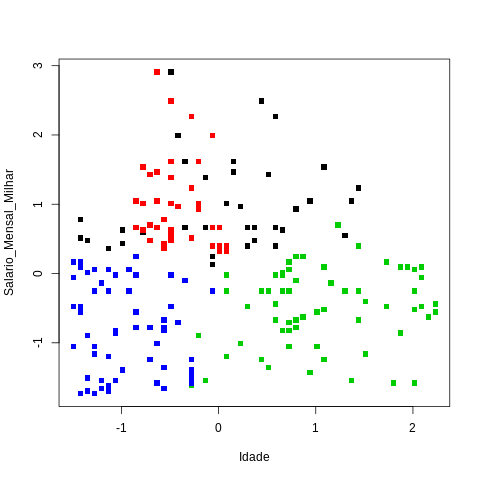

In [45]:
%%R
# Plot do Modelo
plot(dados_clientes_v2_scaled, col = modelo$cluster, pch = 15) 

---
Melhorando a visualização

In [51]:
%%R
# Melhorando a Visualização
?eclust
cluster_viz <- eclust(dados_clientes_v2_scaled, "kmeans", k = 4, nstart = 25, graph = FALSE)

---
Visualizando Clusters K-Means dados Normalizados

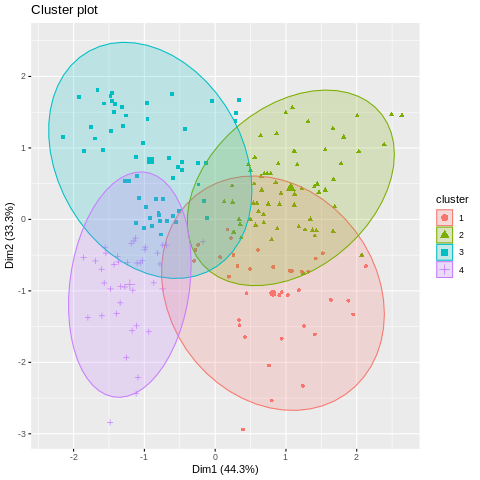

In [49]:
%%R
# Visualizando Clusters K-Means
?fviz_cluster
fviz_cluster(cluster_viz, geom = "point", ellipse.type = "norm")

Outra opção de visualização

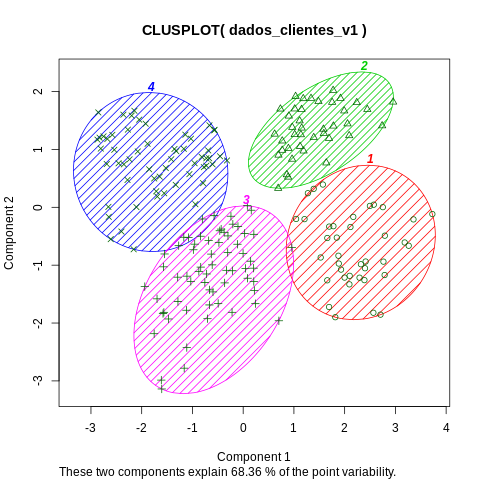

In [50]:
%%R
# Outra opção de visualização com conjunto de dados Original
?clusplot
par(c(1,1))
clusplot(dados_clientes_v1, dados_clientes_v1$Cluster, color=TRUE, shade=TRUE, labels=5, lines=0)
